In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('GRAB.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
...,...,...,...,...,...,...,...
502,2023-11-30,3.020,3.094,3.00,3.04,3.04,50506600
503,2023-12-01,3.040,3.120,3.04,3.07,3.07,23317000
504,2023-12-04,3.090,3.185,3.08,3.15,3.15,25401800
505,2023-12-05,3.120,3.165,3.10,3.14,3.14,18192800


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,507.000000,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,3.595700,3.703791,3.465882,3.577515,3.577515,2.033153e+07
std,1.333558,1.356956,1.188023,1.243356,1.243356,1.489141e+07
min,2.330000,2.330000,2.190000,2.310000,2.310000,4.354100e+06
25%,2.927500,3.025000,2.850000,2.940000,2.940000,1.239190e+07
50%,3.230000,3.310000,3.140000,3.220000,3.220000,1.688860e+07
75%,3.610000,3.710000,3.520000,3.600000,3.600000,2.363045e+07
max,13.595000,13.630000,11.010000,11.010000,11.010000,1.788307e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       507 non-null    object 
 1   Open       507 non-null    float64
 2   High       507 non-null    float64
 3   Low        507 non-null    float64
 4   Close      507 non-null    float64
 5   Adj Close  507 non-null    float64
 6   Volume     507 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.9+ KB


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### EKSPLOR DATA ANALIS

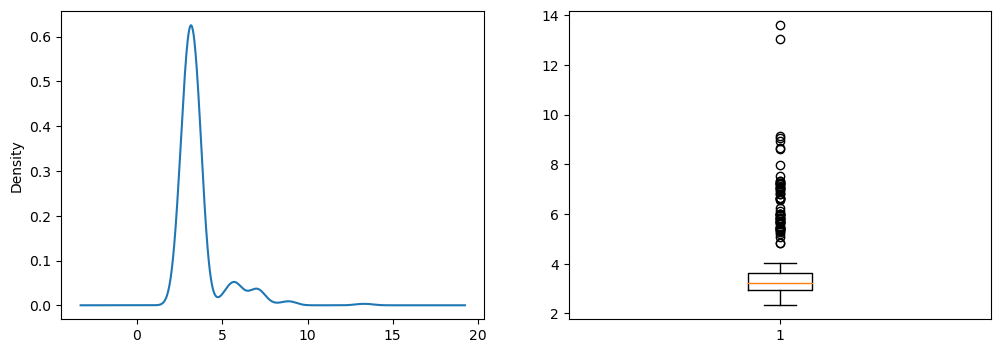

In [39]:
#melihat distribusi dari 'open'

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Open'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Open'])
plt.show()

#### *Dapat dilihat bahwa mean dan median dari 'Open' terpusat disekitar nilai 3

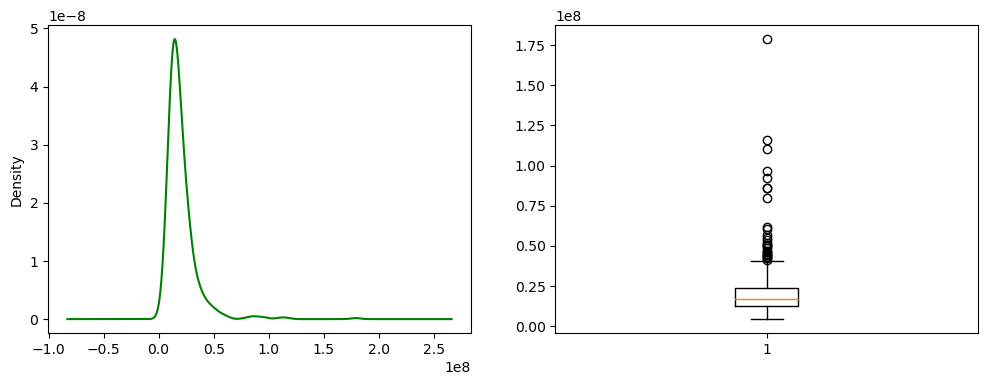

In [11]:
#melihat distribusi dari 'volume'

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Volume'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['Volume'])
plt.show()

### VISUALISASI

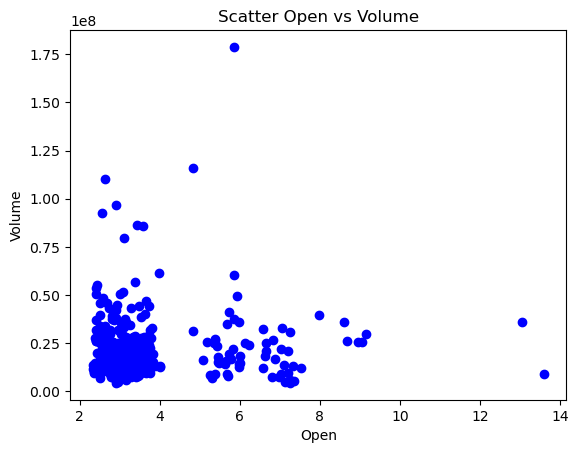

In [32]:
plt.scatter(df['Open'], df['Volume'], color='blue')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Scatter Open vs Volume')
plt.show()

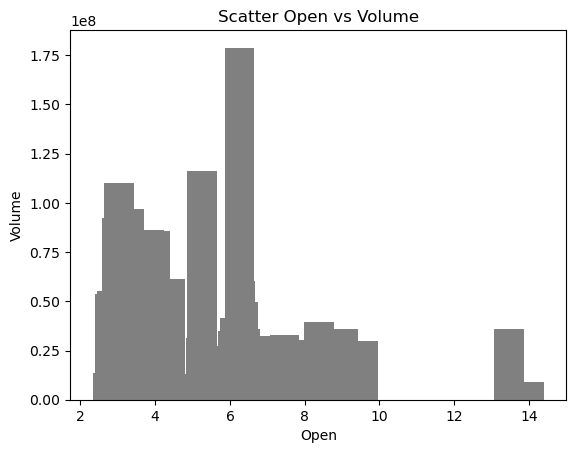

In [47]:
plt.bar(df['Open'], df['Volume'], align='edge', color='grey')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Scatter Open vs Volume')
plt.show()

##### *Dari sini kita tau bahwa korelasi yang kurang signifikan

##### karena ketika nilai volume bertambah, maka nilai open tetap dinilai rendah

In [15]:
from collections import Counter 

print(Counter(df['Volume']))

Counter({8964400: 1, 35751200: 1, 29667200: 1, 25416000: 1, 25775900: 1, 26187700: 1, 36086700: 1, 39572600: 1, 16689400: 1, 32797900: 1, 26431500: 1, 21053300: 1, 21849400: 1, 9573800: 1, 5539700: 1, 4354100: 1, 13381700: 1, 11855800: 1, 13889400: 1, 7289300: 1, 7295300: 1, 8813500: 1, 4685500: 1, 5867700: 1, 30569400: 1, 18589000: 1, 20806900: 1, 25171000: 1, 32226700: 1, 12255500: 1, 23936200: 1, 14430600: 1, 37366700: 1, 15743900: 1, 19200700: 1, 41267600: 1, 26709000: 1, 23614100: 1, 49730900: 1, 35972700: 1, 34813100: 1, 15311400: 1, 8873400: 1, 7885400: 1, 14941100: 1, 16123000: 1, 8767900: 1, 6864200: 1, 8462600: 1, 60463400: 1, 25100600: 1, 21790500: 1, 18128000: 1, 14953900: 1, 12389300: 1, 16555500: 1, 27064600: 1, 25403200: 1, 31376700: 1, 25186500: 1, 178830700: 1, 14092800: 1, 17905500: 1, 116033100: 1, 85831200: 1, 27703000: 1, 28163700: 1, 27930300: 1, 21733200: 1, 19410700: 1, 24168900: 1, 29505600: 1, 35771100: 1, 15341200: 1, 24107800: 1, 12827200: 1, 13185400: 1, 95

In [17]:
print(dict(Counter(df['Volume']).most_common(10)))

{8964400: 1, 35751200: 1, 29667200: 1, 25416000: 1, 25775900: 1, 26187700: 1, 36086700: 1, 39572600: 1, 16689400: 1, 32797900: 1}


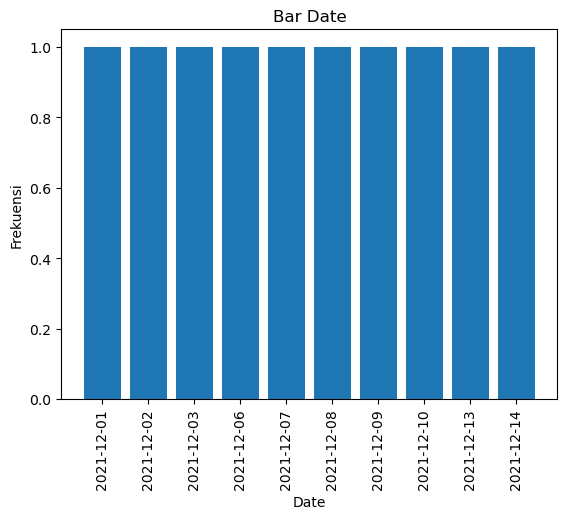

In [24]:
nationality_dict = dict(Counter(df['Date']).most_common(10))

plt.bar(nationality_dict.keys(), nationality_dict.values())

plt.xlabel('Date')

plt.ylabel('Frekuensi')

plt.title('Bar Date')

plt.xticks(rotation=90)

plt.show()

In [25]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
5,2021-12-08,8.670,8.990,8.55,8.89,8.89,26187700
6,2021-12-09,8.614,8.614,7.60,8.08,8.08,36086700
7,2021-12-10,7.980,7.980,6.93,7.12,7.12,39572600
8,2021-12-13,6.885,7.280,6.85,7.17,7.17,16689400
9,2021-12-14,7.060,7.080,5.91,6.79,6.79,32797900


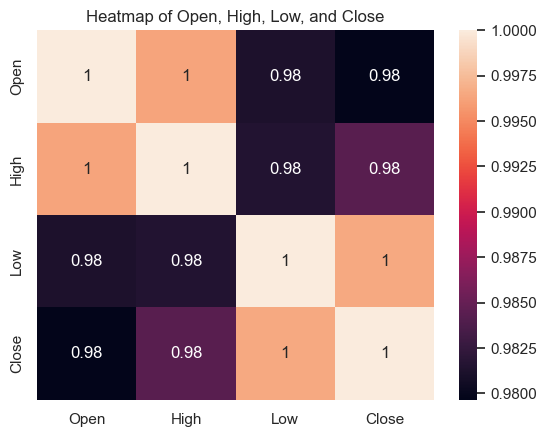

In [31]:
corr = df[['Open', 'High', 'Low', 'Close']].corr()

sns.heatmap(corr, annot=True)

plt.title('Heatmap of Open, High, Low, and Close')

plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


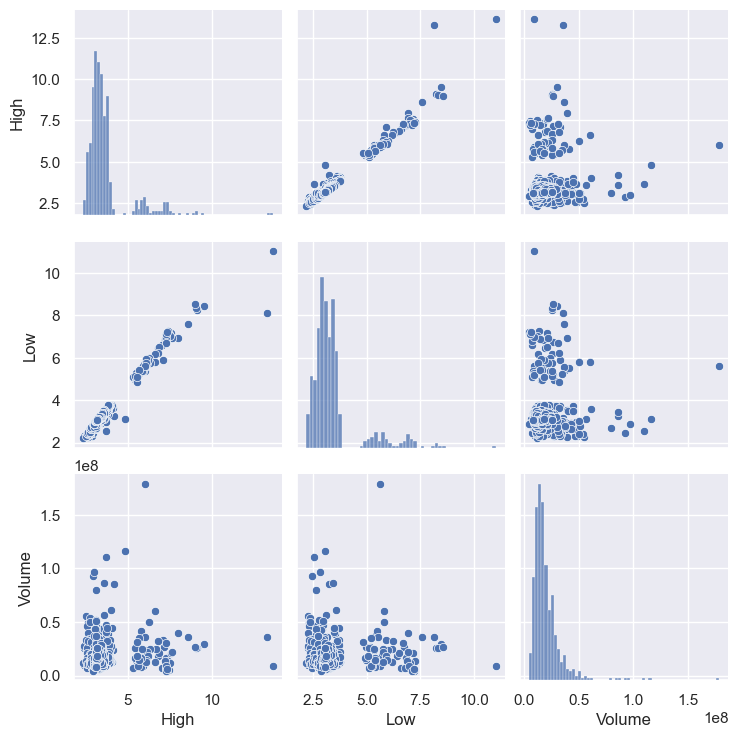

In [38]:
data = df[['High', 'Low', 'Volume',]]

sns.pairplot(data)

plt.show()

In [11]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
df['Date'] = df['Date'].astype(float)

In [12]:
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,NaN,1.000000,0.996342,0.981232,0.979652,0.979652,0.055962
High,NaN,0.996342,1.000000,0.981485,0.984290,0.984290,0.081956
Low,NaN,0.981232,0.981485,1.000000,0.996542,0.996542,0.016236
Close,NaN,0.979652,0.984290,0.996542,1.000000,1.000000,0.039761
Adj Close,NaN,0.979652,0.984290,0.996542,1.000000,1.000000,0.039761
Volume,NaN,0.055962,0.081956,0.016236,0.039761,0.039761,1.000000


##### korelasi untuk nilai volume dan open adalah 0.05 atau 5% dengan kategori sangat rendah

### MODELING

In [39]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
5,2021-12-08,8.670,8.990,8.55,8.89,8.89,26187700
6,2021-12-09,8.614,8.614,7.60,8.08,8.08,36086700
7,2021-12-10,7.980,7.980,6.93,7.12,7.12,39572600
8,2021-12-13,6.885,7.280,6.85,7.17,7.17,16689400
9,2021-12-14,7.060,7.080,5.91,6.79,6.79,32797900


In [40]:
x = df['High'].values.reshape(-1,1)
y = df['Volume'].values.reshape(-1,1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
lin_reg = LinearRegression()

In [43]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [49]:
#nilai m dan b
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[600928.90043515]]
[18170608.73033923]


In [48]:
#nilai score accurasy 
lin_reg.score(x_test, y_test)

0.01830848220986181

##### mendapatkan akurasi skor sebesar 1,83%

### visualisasi data line

Text(0.5, 1.0, 'Plot Horsepower vs Price')

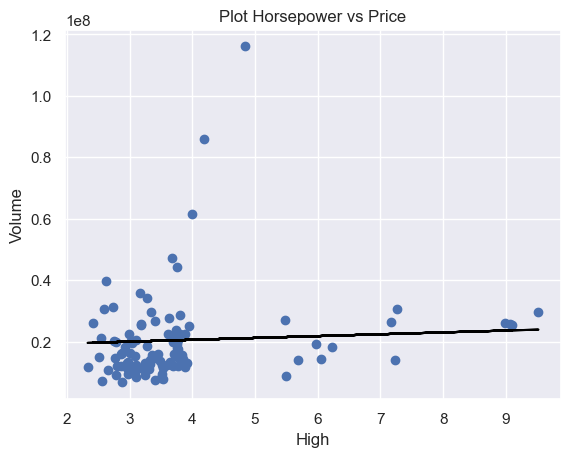

In [58]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='black',)
plt.xlabel('High')
plt.ylabel('Volume')
plt.title('Plot Horsepower vs Price')

### PREDIKSI

In [63]:
#Prediksi volume dari nilai high 1.00
lin_reg.predict([[1.00]])

array([[18771537.63077438]])

In [64]:
#Prediksi volume dari nilai high 0.98
lin_reg.predict([[0.98]])

array([[18759519.05276567]])

In [66]:
#Prediksi volume dari nilai high 8.61
lin_reg.predict([[8.61]])

array([[23344606.56308585]])